<a href="https://colab.research.google.com/github/riteshk2311/machinelearning/blob/master/web_Scraping_and_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
df = pd.DataFrame(columns=["Title", "Location", "Company", 
                           "Salary", "Sponsored"])

In [ ]:
driver = webdriver.Chrome("/Users/techsim/Downloads/chromedriver")

In [ ]:
from time import sleep
for i in range(0, 500, 10):
    driver.get("https://www.indeed.co.in/jobs?q=artificial+intelligence&l=India&start="+str(i))
    titles = []
    locations = []
    companys = []
    salarys = []
    sponsoreds = []
    sleep(5)
    elements = driver.find_elements_by_class_name("result")
    for job in elements:
        soup = BeautifulSoup(job.get_attribute("innerHTML"), 'html.parser')
        try:
            title = soup.find("a", class_="jobtitle").text.replace("\n","").strip()
            titles.append(title)
        except:
            title = None
            titles.append(title)
        
        try:
            location = soup.find( class_="location").text.replace("\n","").strip()
            locations.append(location)
        except:
            location = None
            locations.append(location)
        
        try:
            company = soup.find(class_="company").text.replace("\n","").strip()
            companys.append(company)
        except:
            company = None
            companys.append(company)
        
        try:
            salary = soup.find( class_="salary").text.replace("\n","").strip()
            salarys.append(salary)
        except:
            salary = None
            salarys.append(salary)
        
        try:
            sponsored = soup.find(class_="sponsoredGray").text.replace("\n","").strip()
            sponsored = "sponsored"
            sponsoreds.append(sponsored)
        except:
            sponsored = None
            sponsoreds.append(sponsored)
        
df = pd.DataFrame({
    "Title":titles,
    "Location":locations,
    "Company":companys,
    "Salary":salarys,
    "Sponsored":sponsoreds
})
df.to_csv("ai.csv")

      
    
    
    

In [ ]:
df1 = pd.read_csv("./machinelearning.csv")
df2 = pd.read_csv("./new_ai.csv")
df3 = pd.read_csv("./data_analyst.csv")
df4 = pd.read_csv("./datascience2.csv")

In [ ]:
df = pd.concat([df1, df2, df3, df4], axis=0).drop_duplicates()

In [ ]:
df.shape

(1384, 6)

In [ ]:
df["Sponsored"].value_counts()

Organic      1207
Sponsored     177
Name: Sponsored, dtype: int64

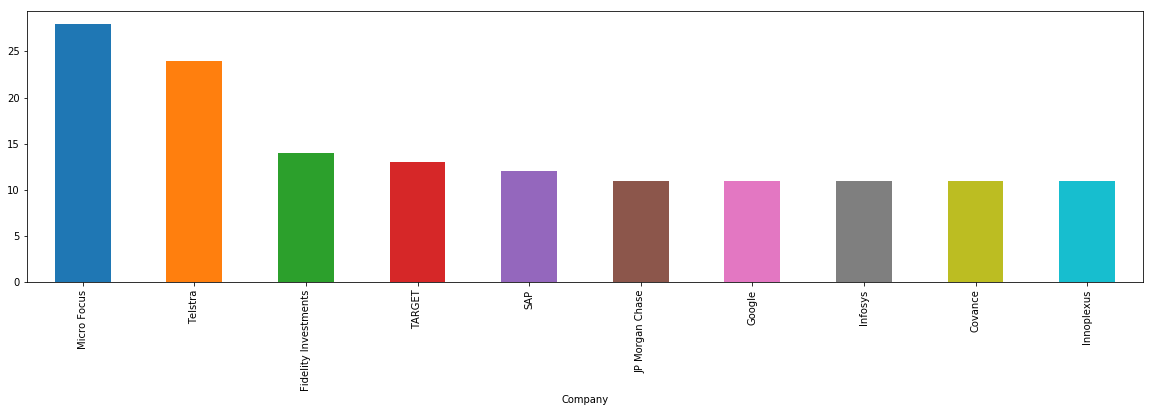

In [ ]:
import matplotlib.pyplot as plt
g = df.groupby("Company")
value = g.count()["Title"].sort_values(ascending = False)[:10]
v = value.values
v
value.plot("bar", figsize = (20, 5))
plt.show()


In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words("english")



In [ ]:
def CleanData(desc):
    desc = word_tokenize(desc)
    data = []
    for word in desc:
        lower = word.lower()
        if lower not in stop_words:
            data.append(lower)
    return data
            
            

In [ ]:
tags_df = df["Description"].apply(CleanData)

In [ ]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key = lambda kv: kv[1], reverse=True)
result_series = pd.Series(
{
  k:v  for k, v in result
})

result_series

In [ ]:
skills = ["opencv", "pandas", "nltk", "matplotlib", "django", "math"]

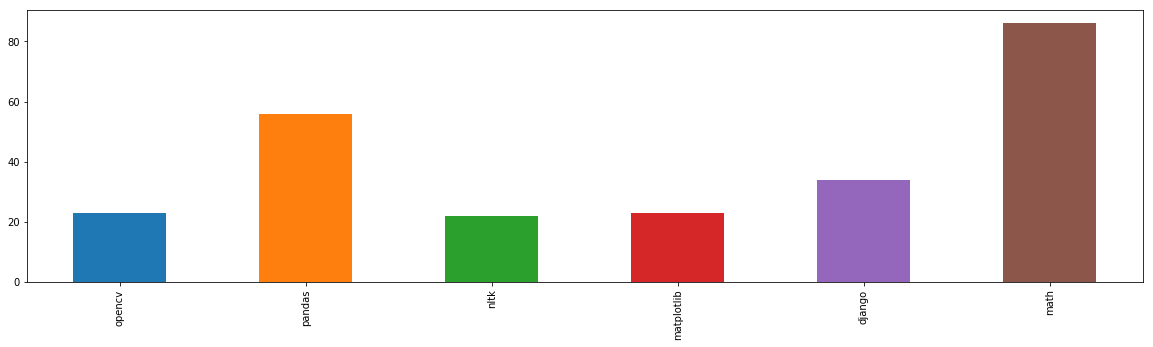

In [ ]:
filter1 = result_series.filter(items=skills)
filter1.plot('bar', figsize = (20, 5))
plt.show()